#**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import random
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

# **Get The Data**

In [ ]:
data_train = pd.read_csv("/content/fashion-mnist_train.csv")
data_test = pd.read_csv("/content/fashion-mnist_test.csv")

# **Let's Look At The Data**

**Train Data**

In [ ]:
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
data_train.shape

(60000, 785)

**Test Data**

In [ ]:
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [ ]:
data_test.shape

(10000, 785)

**Visualize For see The Image**

In [ ]:
training = np.array(data_train , dtype = 'float32')
testing = np.array(data_test , dtype = 'float32')

here we choose random row and take all the row but we ignore the label to plot the bixels😁

Remember the 10 classes decoding is as follows:

0 => T-shirt/top

1 => Trouser

2 => Pullover

3 => Dress

4 => Coat

5 => Sandal

6 => Shirt

7 => Sneaker

8 => Bag

9 => Ankle boot


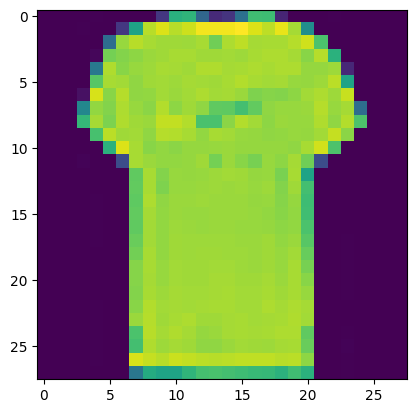

In [ ]:
plt.imshow(training[10,1:].reshape(28,28))
plt.show()

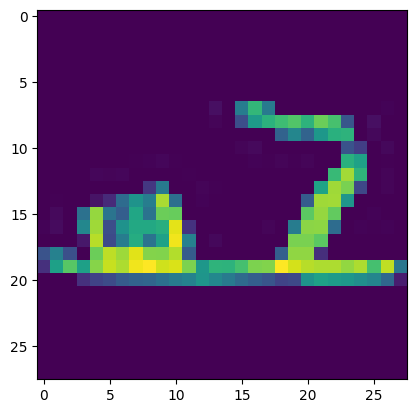

In [ ]:
plt.imshow(training[66,1:].reshape(28,28))
plt.show()

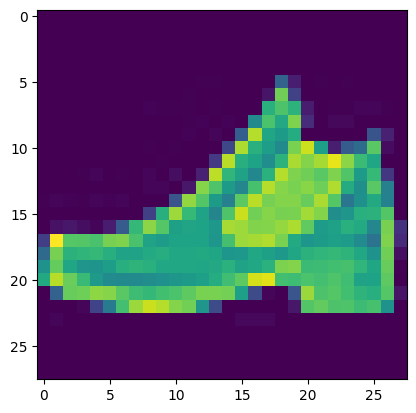

In [ ]:
plt.imshow(training[1,1:].reshape(28,28))
plt.show()

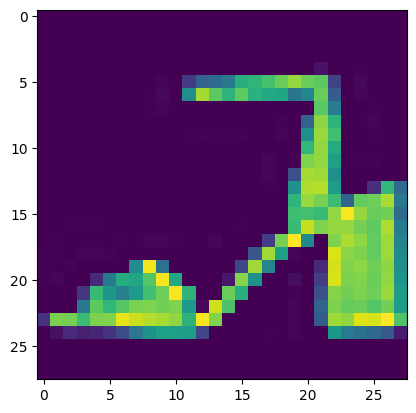

In [ ]:
plt.imshow(training[60,1:].reshape(28,28))
plt.show()

here we creat code for choosing random number and visualize the bixel and display the label of it 👍

7.0

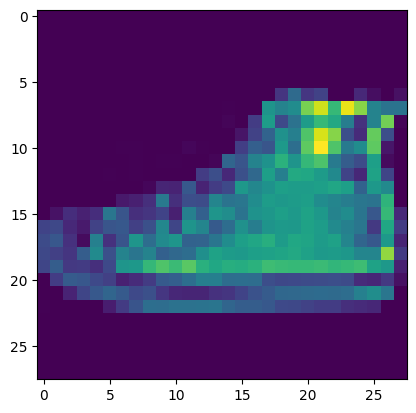

In [ ]:
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i , 0]
label

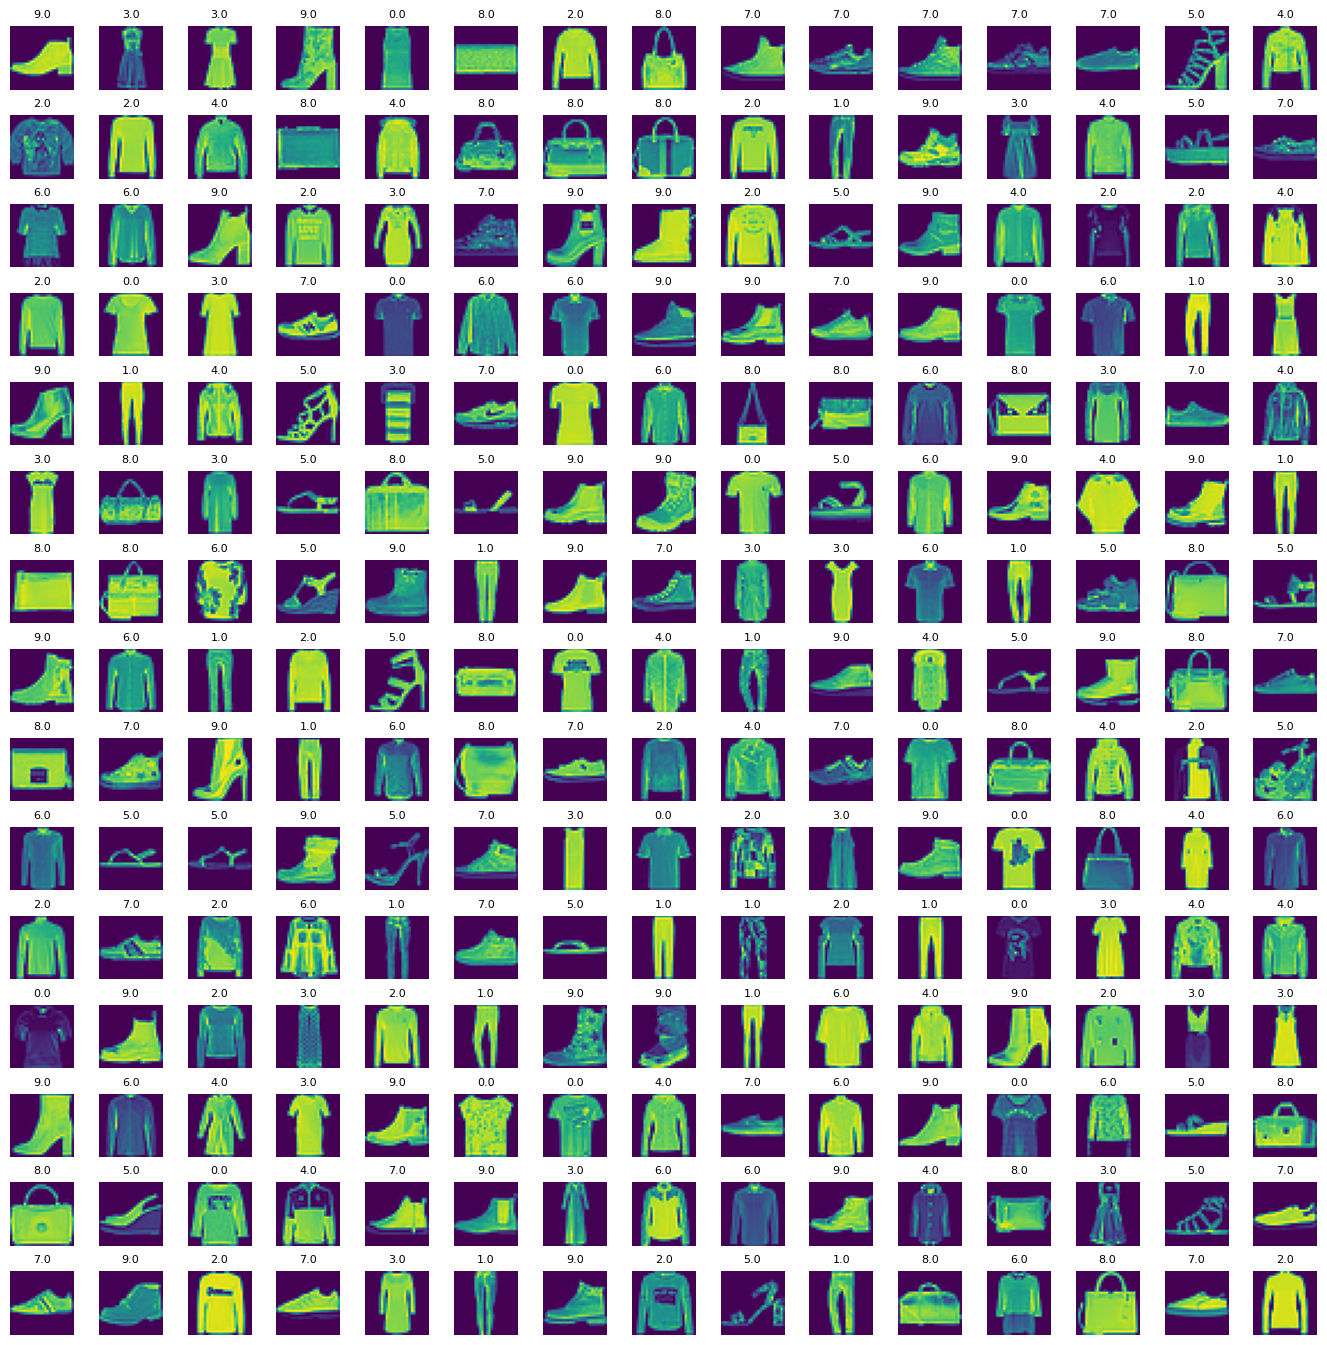

In [ ]:
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Split The Data

In [ ]:
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [ ]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [ ]:
X_train.shape , X_validate.shape , X_test.shape

((48000, 784), (12000, 784), (10000, 784))

In [ ]:
y_train.shape , y_validate.shape , y_test.shape

((48000,), (12000,), (10000,))

In [ ]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [ ]:
X_train.shape , X_validate.shape , X_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

# Bulding Model

In [ ]:
cnn_model = Sequential()

In [ ]:
# Try 32 fliters first then 64
cnn_model.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))

In [ ]:
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
cnn_model.add(Dropout(0.25))

In [ ]:
cnn_model.add(Flatten())

In [ ]:
cnn_model.add(Dense(activation = 'relu' , units = 32 ))

In [ ]:
cnn_model.add(Dense(units = 10, activation = 'sigmoid'))

In [ ]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
epochs = 50

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        epochs= epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 4s 36ms/step - loss: 1.2941 - accuracy: 0.5657 - val_loss: 0.7332 - val_accuracy: 0.7358
Epoch 2/50
94/94 [==============================] - 3s 34ms/step - loss: 0.6796 - accuracy: 0.7529 - val_loss: 0.6038 - val_accuracy: 0.7872
Epoch 3/50
94/94 [==============================] - 3s 37ms/step - loss: 0.5980 - accuracy: 0.7830 - val_loss: 0.5496 - val_accuracy: 0.8054
Epoch 4/50
94/94 [==============================] - 4s 38ms/step - loss: 0.5559 - accuracy: 0.7992 - val_loss: 0.5171 - val_accuracy: 0.8147
Epoch 5/50
94/94 [==============================] - 3s 33ms/step - loss: 0.5281 - accuracy: 0.8068 - val_loss: 0.4940 - val_accuracy: 0.8207
Epoch 6/50
94/94 [==============================] - 3s 33ms/step - loss: 0.5110 - accuracy: 0.8127 - val_loss: 0.4802 - val_accuracy: 0.8246
Epoch 7/50
94/94 [==============================] - 4s 42ms/step - loss: 0.4959 - accuracy: 0.8199 - val_loss: 0.4692 - val_accuracy: 0.8297
Epoch 8/50
94

# Evaluation

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3428 - accuracy: 0.8722
Test Accuracy : 0.872


In [ ]:
y_predict = np.argmax(cnn_model.predict(X_test), axis=-1)


313/313 [==============================] - 1s 1ms/step


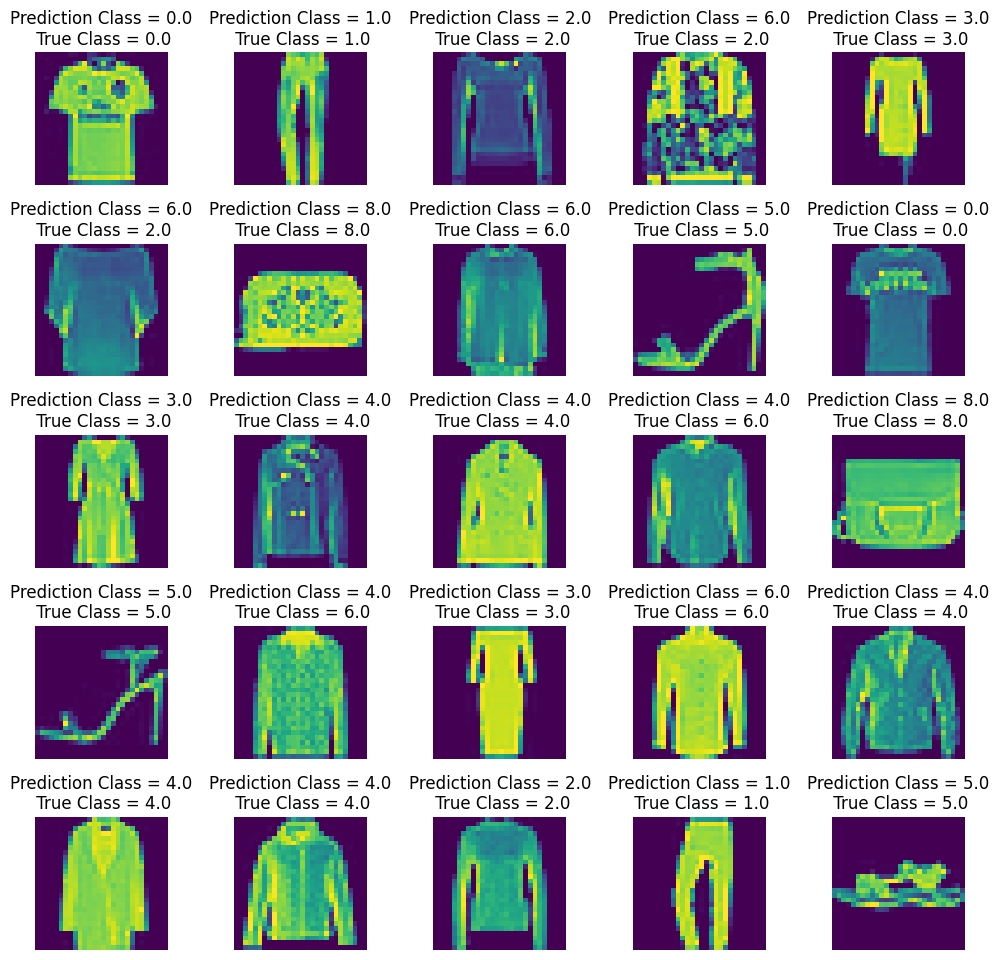

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(y_predict[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

<Axes: >

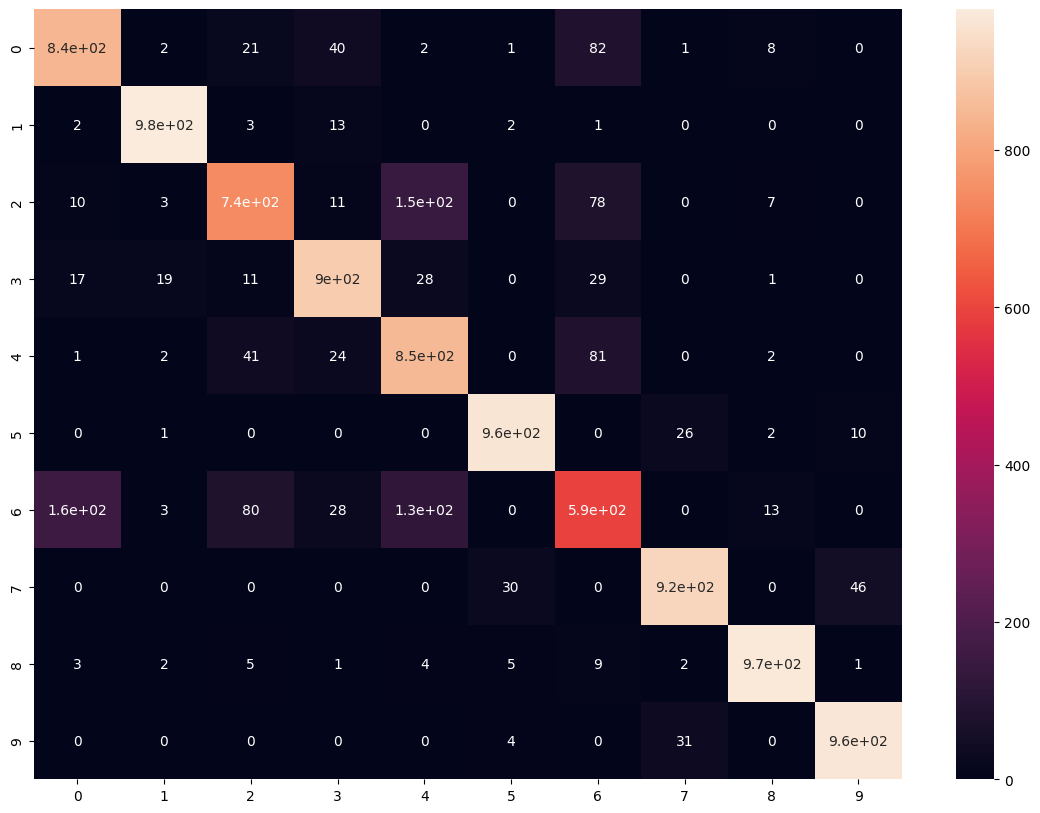

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, y_predict, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.82      0.84      0.83      1000
     Class 1       0.97      0.98      0.97      1000
     Class 2       0.82      0.74      0.78      1000
     Class 3       0.88      0.90      0.89      1000
     Class 4       0.73      0.85      0.79      1000
     Class 5       0.96      0.96      0.96      1000
     Class 6       0.68      0.59      0.63      1000
     Class 7       0.94      0.92      0.93      1000
     Class 8       0.97      0.97      0.97      1000
     Class 9       0.94      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

